In [13]:
import os
from pdf2image import convert_from_path
import pytesseract
import copy
from PIL import ImageDraw


data_dir = '/home/nhaga/dev/upwork'
state = 'delhi'
input_file_location = os.path.join(data_dir, f'{state}_sample_input.pdf')

pages = convert_from_path(input_file_location, 500)

def parseBox(img, row=1, col=1):
    top_margin = 290
    left_margin = 165
    width = 1255
    height = 480
    row_margin = 7
    
    x = (left_margin + (col-1) * width, top_margin + (row-1) * height + (row-1) * row_margin)
    y = (left_margin + col * width, top_margin + row * height + row * row_margin)
    
    fields = {
        "name": ((x[0] + 200, x[1] + 80), (x[0] + 900, x[1] + 140)),
        "relationship": ((x[0] + 20, x[1] + 140), (x[0] + 220, x[1] + 210)),        
        "father": ((x[0] + 380, x[1] + 140), (x[0] + 900, x[1] + 210)),
        "husband": ((x[0] + 430, x[1] + 140), (x[0] + 900, x[1] + 210)),
        'house_number': ((x[0] + 380, x[1] + 210), (x[0] + 600, x[1] + 270)),
        "age": ((x[0] + 135, x[1] + 270), (x[0] + 230, x[1] + 340)),
        "sex": ((x[0] + 360, x[1] + 270), (x[0] + 600, x[1] + 340))
    }

    data = {}
    for key in fields:        
        custom_config = r'--oem 3 --psm 6'        
        cropped_img = img.crop(tuple(el for tupl in fields.get(key) for el in tupl) )
        if 'relationship' in data:
            if key == 'father' and "Husband" in data['relationship']:
                continue
            if key == 'husband' and "Father" in data['relationship']:
                continue
        data[key] = pytesseract.image_to_string(cropped_img, config=custom_config)
        
    return data

parseBox(pages[0], 2, 1)

{'name': 'KAMNA',
 'relationship': 'Husband',
 'husband': 'DEEPAK SAINI',
 'house_number': '57',
 'age': '28',
 'sex': 'FEMALE'}

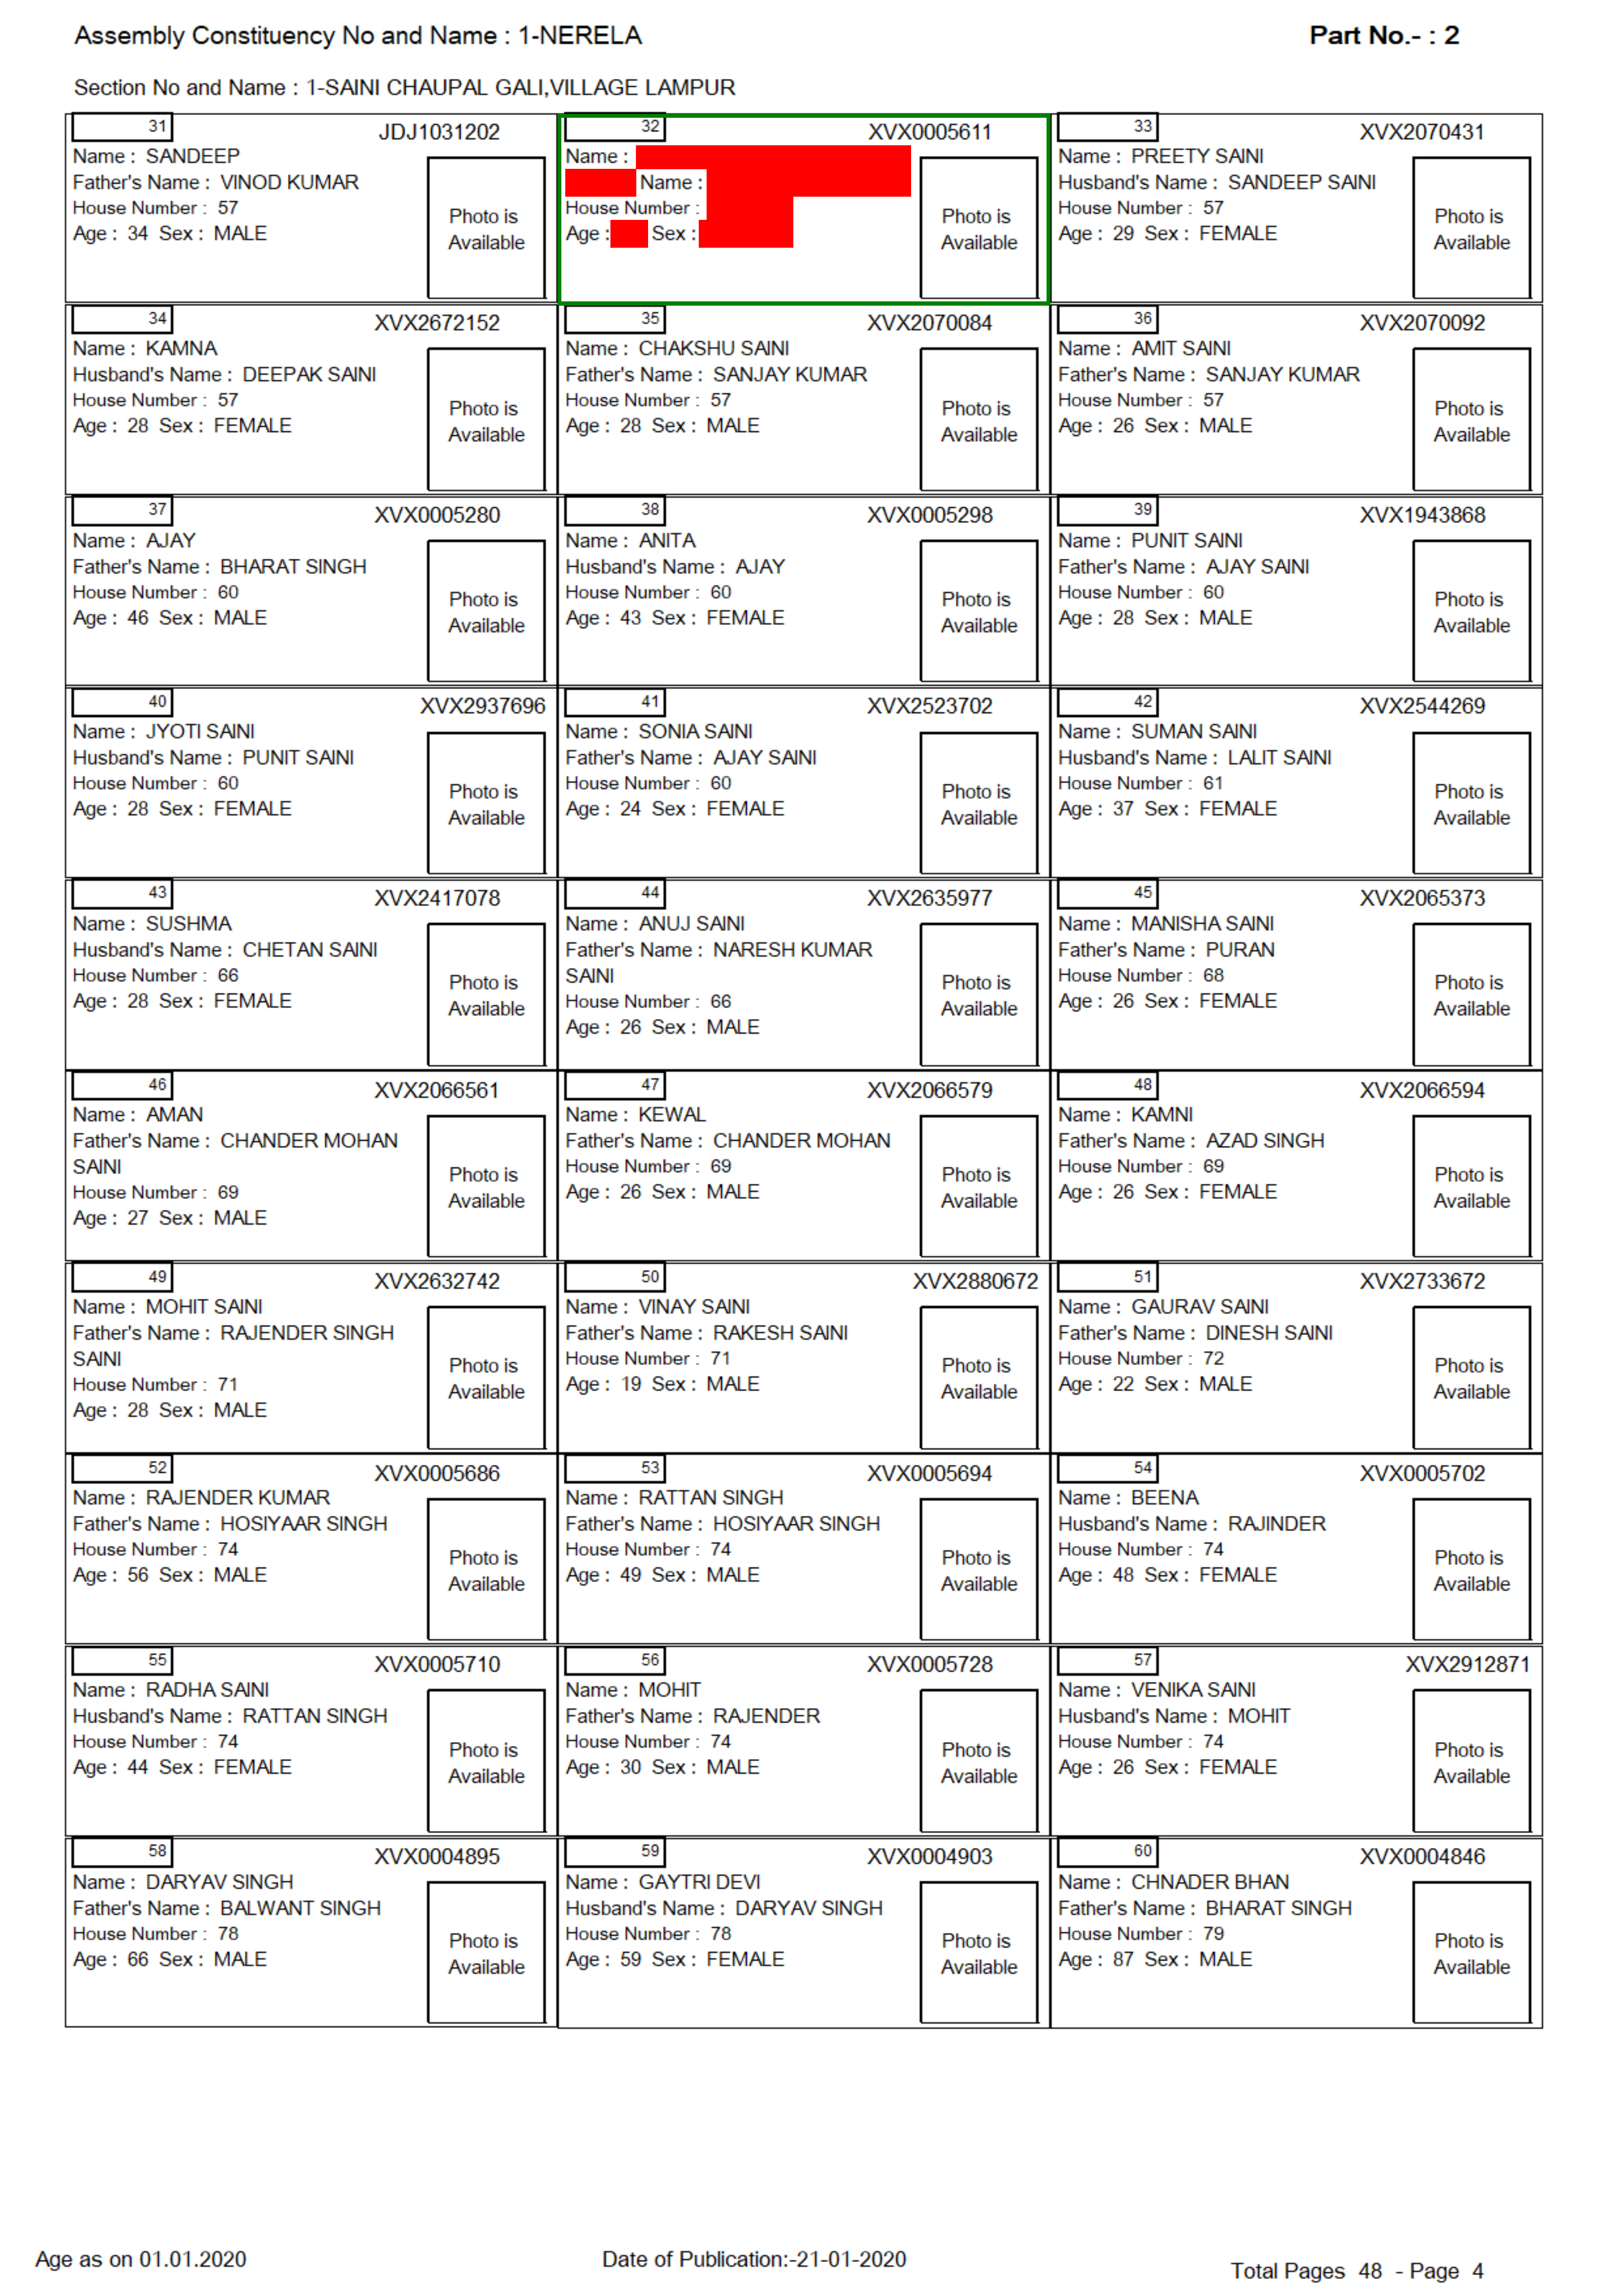

In [7]:
def drawBox(img, row=1, col=1):
    source_img = copy.deepcopy(img)
    draw = ImageDraw.Draw(source_img, 'RGBA')
    top_margin = 290
    left_margin = 165
    width = 1255
    height = 480
    row_margin = 7
    
    x = (left_margin + (col-1) * width, top_margin + (row-1) * height + (row-1) * row_margin)
    y = (left_margin + col * width, top_margin + row * height + row * row_margin)
    draw.rectangle((x, y), outline="green", width=10)
    
    fields = {
        #"number": ((x[0] + 20, x[1]), (x[0] + 275, x[1] + 70)),
        "name": ((x[0] + 200, x[1] + 80), (x[0] + 900, x[1] + 140)),
        "relationship": ((x[0] + 20, x[1] + 140), (x[0] + 200, x[1] + 210)),        
        "father": ((x[0] + 380, x[1] + 140), (x[0] + 900, x[1] + 210)),
        "husband": ((x[0] + 430, x[1] + 140), (x[0] + 900, x[1] + 210)),
        'house_number': ((x[0] + 380, x[1] + 210), (x[0] + 600, x[1] + 270)),
        "age": ((x[0] + 135, x[1] + 270), (x[0] + 230, x[1] + 340)),
        "sex": ((x[0] + 360, x[1] + 270), (x[0] + 600, x[1] + 340))
    }

    data = {}
    for key in fields:        
        draw.rectangle(fields.get(key), fill="red")

    return source_img

drawBox(pages[0], 1, 2)